Base de dados retirada do kaggle 

https://www.kaggle.com/datasets/datafiniti/fast-food-restaurants

In [1]:
## importando libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
from geopy import distance
import gurobipy as gp

In [2]:
# importando arquivo com dados
data = pd.read_csv(r'C:\Users\Samuel Natividade\Desktop\Estudo_Mestrado\PTR5744 - Pesquisa Operacional Aplicada ao Planejamento de Transportes (2022)\Datafiniti_Fast_Food_Restaurants.csv', sep = ',')
data.head(10)

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...
5,AVwc57jLkufWRAb50ROs,2015-10-23T23:59:49Z,2018-06-26T02:59:43Z,9768 Grand River Ave,Fast Food Restaurant,Detroit,US,us/mi/detroit/9768grandriverave/-791445730,42.368823,-83.138251,Wendy's,48204,MI,https://foursquare.com/v/wendys/4bfec191e584c9...,http://www.wendys.com
6,AVwc81QgkufWRAb50vnI,2015-09-21T07:47:08Z,2018-06-26T02:59:43Z,13600 W McNichols Rd,Fast Food Restaurant,Detroit,US,us/mi/detroit/13600wmcnicholsrd/-2061630068,42.416819,-83.180444,Burger King,48235,MI,https://foursquare.com/v/burger-king/4bab7981f...,"http://bk.com,http://www.bk.com"
7,AVwdVafPByjofQCxoA6y,2016-06-06T16:15:08Z,2018-06-26T02:59:41Z,4111 Oceanside Blvd,Fast Food,Oceanside,US,us/ca/oceanside/4111oceansideblvd/1143321601,33.205722,-117.288645,Chipotle Mexican Grill,92056,CA,https://www.trip.com/oceanside-ca/restaurants/...,"http://www.chipotle.com,http://www.lasalsa.com"
8,AVwc4JQKIN2L1WUfp3hU,2016-12-13T12:34:52Z,2018-06-26T02:59:32Z,162 Old Country Rd,Fast Food Restaurants,Riverhead,US,us/ny/riverhead/162oldcountryrd/267504952,40.937359,-72.650142,7-Eleven,11901,NY,http://www.local.com/business/details/yx/river...,"http://www.7-eleven.com/?yext=39326,http://www..."
9,AVwdhkOGByjofQCxp9qV,2016-04-16T16:20:41Z,2018-06-25T12:05:40Z,1407 S Stockton Ave,Fast Food Restaurant,Monahans,US,us/tx/monahans/1407sstocktonave/-1721138121,31.580721,-102.891455,Dairy Queen,79756,TX,https://foursquare.com/v/dairy-queen/4bd4fd7b6...,"http://www.dairyqueen.com,http://api.citygridm..."


In [3]:
print('Quantidade de fast foods:', len(data))

Quantidade de fast foods: 10000


In [4]:
data_1 = data.drop_duplicates(subset=['latitude','longitude'], inplace = True)
data_1 = data_1 = data[(data['latitude']>= 25) & (data['latitude']<55)]

In [5]:
data_1 = data_1.head(50)

In [6]:
data_1.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...
5,AVwc57jLkufWRAb50ROs,2015-10-23T23:59:49Z,2018-06-26T02:59:43Z,9768 Grand River Ave,Fast Food Restaurant,Detroit,US,us/mi/detroit/9768grandriverave/-791445730,42.368823,-83.138251,Wendy's,48204,MI,https://foursquare.com/v/wendys/4bfec191e584c9...,http://www.wendys.com


In [7]:
data_1.shape

(50, 15)

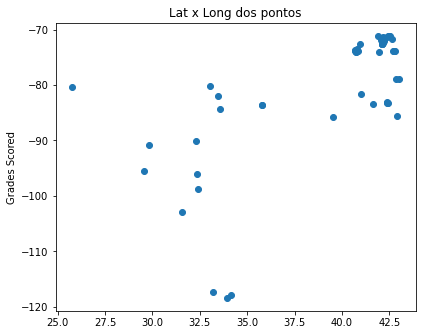

In [8]:
fig=plt.figure(figsize = (5,4))
ax=fig.add_axes([0,0,1,1])
ax.scatter(data_1['latitude'],data_1['longitude'])
ax.set_ylabel('Grades Scored')
ax.set_title('Lat x Long dos pontos')
plt.show()

In [9]:
print('Quantidade de fast foods:', len(data_1))

Quantidade de fast foods: 50


In [10]:
distancias = data_1[['latitude','longitude']]

In [11]:
# Criando um lista de distâncias
fator_circuito = 1.21 # reff ballou
lista_distancias_caminhao = []
lista_localizacao = list(distancias[['latitude', 'longitude']].itertuples(index=False, name=None))
for localizacao_origem in lista_localizacao:
    for localizacao_destino in lista_localizacao:
        valor = fator_circuito*round(distance.distance(localizacao_origem, localizacao_destino).km,2)
        print('Distancia de', localizacao_origem, 'para ', localizacao_destino, 'é :', valor)
        lista_distancias_caminhao.append(valor)
print('distancias colocadas na lista')
#lista_distancias_caminhao

Distancia de (29.814697, -90.814742) para  (29.814697, -90.814742) é : 0.0
Distancia de (29.814697, -90.814742) para  (35.803788, -83.580553) é : 1147.3099
Distancia de (29.814697, -90.814742) para  (35.782339, -83.551408) é : 1147.7213
Distancia de (29.814697, -90.814742) para  (33.562738, -84.321143) é : 898.4612999999999
Distancia de (29.814697, -90.814742) para  (42.368823, -83.138251) é : 1879.6987
Distancia de (29.814697, -90.814742) para  (42.416819, -83.180444) é : 1883.3408
Distancia de (29.814697, -90.814742) para  (33.205722, -117.288645) é : 3068.3785
Distancia de (29.814697, -90.814742) para  (40.937359, -72.650142) é : 2485.0859
Distancia de (29.814697, -90.814742) para  (31.580721, -102.891455) é : 1419.088
Distancia de (29.814697, -90.814742) para  (32.36602, -96.103364) é : 699.8276999999999
Distancia de (29.814697, -90.814742) para  (29.570079, -95.568166) é : 557.5801
Distancia de (29.814697, -90.814742) para  (41.005682, -81.555774) é : 1812.0596999999998
Distancia 

In [12]:
# criando uma duas listas com vetor de origem e destino
lista_1 = []
lista_2 = []
for pontos in range(len(distancias +1)):
    for pontos2 in range(len(distancias +1)):
        lista_1.append(pontos)
        lista_2.append(pontos2)


In [13]:
tupla_origem_destino = list(zip(lista_1, lista_2))

In [17]:
zip_iterator = zip(tupla_origem_destino, lista_distancias_caminhao) #Get pairs of elements.
d_ij= dict(zip_iterator) # distancia do caminhao
d_ij

{(0, 0): 0.0,
 (0, 1): 1147.3099,
 (0, 2): 1147.7213,
 (0, 3): 898.4612999999999,
 (0, 4): 1879.6987,
 (0, 5): 1883.3408,
 (0, 6): 3068.3785,
 (0, 7): 2485.0859,
 (0, 8): 1419.088,
 (0, 9): 699.8276999999999,
 (0, 10): 557.5801,
 (0, 11): 1812.0596999999998,
 (0, 12): 983.4758999999999,
 (0, 13): 3144.5359,
 (0, 14): 1297.5313999999998,
 (0, 15): 1774.7917,
 (0, 16): 3196.0456,
 (0, 17): 340.7118,
 (0, 18): 1847.4763999999998,
 (0, 19): 1418.7492,
 (0, 20): 2357.7334,
 (0, 21): 1124.453,
 (0, 22): 1879.6866,
 (0, 23): 2717.9746,
 (0, 24): 2522.2328999999995,
 (0, 25): 2449.4876999999997,
 (0, 26): 2357.2615,
 (0, 27): 2353.8493,
 (0, 28): 2387.2937,
 (0, 29): 2395.1466,
 (0, 30): 2524.4956,
 (0, 31): 2368.9258999999997,
 (0, 32): 2518.3367,
 (0, 33): 2177.6249,
 (0, 34): 2191.0074999999997,
 (0, 35): 2725.8033,
 (0, 36): 2655.3571,
 (0, 37): 2725.5613000000003,
 (0, 38): 2631.0602999999996,
 (0, 39): 2707.4718,
 (0, 40): 2692.3105,
 (0, 41): 2691.7539,
 (0, 42): 2683.5742999999998,
 (0

In [19]:
# Modelagem do problema
# modelo
m = gp.Model()


# índices 



#parametros do problema
c = len(data_1) # qtd d pontos
origem = [i for i in range(len(data_1))]
destino = [i  for i in range(len(data_1))]
d_ij = d_ij.copy()


# variaveis_de_decisao
x_ij = m.addVars(origem,destino, vtype = gp.GRB.BINARY)
u = m.addVars(origem[1:], vtype = gp.GRB.INTEGER, ub = c - 1 )

# ub 


In [20]:
# função objetivo
m.setObjective(x_ij.prod(d_ij), sense = gp.GRB.MINIMIZE)

In [21]:
# restrição que garante que o ponto origem será exatamente 1 vez
c1 = m.addConstrs(gp.quicksum(x_ij[i,j] for j in destino if i != j) == 1

    for i in origem)

# restriçao que garante que cada ponto será destino somente 1 vez
c2 = m.addConstrs(
    gp.quicksum(x_ij[i,j] for i in origem if i != j ) == 1

    for j in destino)

# eliminação de subrotas
c3 = m.addConstrs( u[i] - u[j] + c * x_ij[i, j] <= c-1 


    for i in origem[1:] for j in destino[1:] if i != j
)



In [22]:
m.Params.timeLimit = 600
m.optimize()



Changed value of parameter timeLimit to 600.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2452 rows, 2549 columns and 11956 nonzeros
Model fingerprint: 0x50a67b47
Variable types: 0 continuous, 2549 integer (2500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [2e+00, 5e+03]
  Bounds range     [1e+00, 5e+01]
  RHS range        [1e+00, 5e+01]
Presolve removed 0 rows and 50 columns
Presolve time: 0.02s
Presolved: 2452 rows, 2499 columns, 11956 nonzeros
Variable types: 0 continuous, 2499 integer (2450 binary)
Found heuristic solution: objective 92933.481300

Root relaxation: objective 7.494317e+03, 142 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 7494.31698 

In [23]:
if m.SolCount == 0:
    print('Sem solucao, status = %d' % m.Status)
else:
    print('Função objetivo é %.4f\n' % m.ObjVal)
    
print('Tempo de execucao é %.4fs\n' %m.Runtime)

for i in origem:
    print("{:02d}: ".format(i), end = "")
    for j in destino:
        print(round(x_ij[i,j].X), "", end = "")
    print("")


Função objetivo é 14772.8416

Tempo de execucao é 600.0875s

00: 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
01: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
02: 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
03: 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
04: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
05: 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
06: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
07: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
08: 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [26]:
## imprimindo a ordem de arcos
caminho = [0]
anterior = 0

for ponto in range(c): # para repetir 50 vzs
    for j in destino: # para todos os destinos
        if round(x_ij[anterior, j].X) == 1: # vou prorcurar a variavel x = 1
            caminho.append(j) #adiciona o destino
            anterior = j # o destino adicionado será o próximo anterior
            break


print("O caminho foi:", caminho)

O caminho foi: [0, 10, 8, 6, 16, 13, 12, 9, 17, 3, 2, 1, 19, 18, 22, 5, 4, 15, 11, 33, 34, 24, 32, 30, 25, 45, 43, 44, 46, 47, 38, 36, 48, 40, 37, 35, 23, 39, 41, 42, 7, 29, 28, 31, 26, 27, 20, 21, 14, 49, 0]
